# Item(Clothes) return prediction

### Problem Statement:- 
- Customers send back a substantial part of the products that they purchase online. Return shipping is expensive for online platforms and return orders are said to reach 50% for certain industries and products. Nevertheless, free or inexpensive return shipping has become a customer expectation and de-facto standard in the fierce online competition on clothing, but shops have indirect ways to influence customer purchase behavior. For purchases where return seems likely, a shop could, for example, restrict payment options or display additional marketing communication.

- Classification problem(Binary 0 or 1)
- Need to predict weather the item will be returned by the user or not.



In [1]:
#Importing all the important libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from scipy import stats

#Importing RareLabelEncoder from feature_engine for encoding
from feature_engine.encoding import RareLabelEncoder

#Importing OutlierTrimmer from feature_enine.outliers for outiers
from feature_engine.outliers import OutlierTrimmer

# Importing Extratreesclassifier from sklearn.ensemble and
#mutual_info_classif from sklearn.feature_selection for 'feature selection'
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import mutual_info_classif

# Importing train_test_split to split the data into traning and testing.
from sklearn.model_selection import train_test_split

#Importing RandomForestClassifier from sklearn.ensemble to make a classifier model.
from sklearn.ensemble import RandomForestClassifier

#Importing confusion_matrix, f1_score, accuracy_score from sklearn.metrics to check model accuracy.
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score


In [2]:
#Importing the traning dataset
df = pd.read_csv("TrainingData_V1.csv")

In [3]:
df.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,user_dob,user_state,user_reg_date,return
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,17-04-1969,1013,23-06-2016,0
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,22-04-1970,1001,15-03-2015,1
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,22-04-1970,1001,15-03-2015,0
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,09-01-1960,1013,17-02-2015,0
4,43,23-06-2016,26-06-2016,394,40,black,44,90.0,30827,Mrs,NaN,1006,09-02-2016,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79945 entries, 0 to 79944
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_item_id  79945 non-null  int64  
 1   order_date     79945 non-null  object 
 2   delivery_date  72509 non-null  object 
 3   item_id        79945 non-null  int64  
 4   item_size      79945 non-null  object 
 5   item_color     79945 non-null  object 
 6   brand_id       79945 non-null  int64  
 7   item_price     79945 non-null  float64
 8   user_id        79945 non-null  int64  
 9   user_title     79945 non-null  object 
 10  user_dob       72956 non-null  object 
 11  user_state     79945 non-null  int64  
 12  user_reg_date  79945 non-null  object 
 13  return         79945 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 8.5+ MB


In [5]:
df.describe()

,order_item_id,item_id,brand_id,item_price,user_id,user_state,return
count,79945.000000,79945.000000,79945.000000,79945.000000,79945.000000,79945.000000,79945.000000
mean,50056.599925,924.281231,30.100819,65.088521,27185.708500,1007.268485,0.458590
std,28872.601957,702.577022,28.157290,47.729105,14063.256304,4.281872,0.498285
min,1.000000,1.000000,1.000000,0.000000,9.000000,1001.000000,0.000000
25%,25133.000000,214.000000,5.000000,29.900000,14943.000000,1002.000000,0.000000
50%,49985.000000,812.000000,25.000000,49.900000,31189.000000,1008.000000,0.000000
75%,75118.000000,1582.000000,44.000000,79.900000,38931.000000,1010.000000,1.000000
max,100000.000000,2241.000000,138.000000,999.000000,48241.000000,1016.000000,1.000000


In [6]:
#Checking any null values present.
df.isnull().sum()

order_item_id       0
order_date          0
delivery_date    7436
item_id             0
item_size           0
item_color          0
brand_id            0
item_price          0
user_id             0
user_title          0
user_dob         6989
user_state          0
user_reg_date       0
return              0
dtype: int64

# EDA (Exploratry Data Analysis)

In [7]:
# Making a EDA html Report
# from pandas_profiling import ProfileReport
# report = ProfileReport(df)
# report.to_file("data.html")

In [8]:
# Pairplot of features with target value
# sns.pairplot(df, hue="return")

# Taking care of Missing Values
- missing values at delivery_date and user_dob
- dropping those nan values.

In [9]:
#dropping nan values
df.dropna(inplace=True)

In [10]:
#checking anu nan values
df.isnull().sum()

order_item_id    0
order_date       0
delivery_date    0
item_id          0
item_size        0
item_color       0
brand_id         0
item_price       0
user_id          0
user_title       0
user_dob         0
user_state       0
user_reg_date    0
return           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66162 entries, 0 to 79944
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_item_id  66162 non-null  int64  
 1   order_date     66162 non-null  object 
 2   delivery_date  66162 non-null  object 
 3   item_id        66162 non-null  int64  
 4   item_size      66162 non-null  object 
 5   item_color     66162 non-null  object 
 6   brand_id       66162 non-null  int64  
 7   item_price     66162 non-null  float64
 8   user_id        66162 non-null  int64  
 9   user_title     66162 non-null  object 
 10  user_dob       66162 non-null  object 
 11  user_state     66162 non-null  int64  
 12  user_reg_date  66162 non-null  object 
 13  return         66162 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 7.6+ MB


# Taking care of All Date Catagorical features.
- Date catagorical features are:- delivery_date, order_date, user_dob and user_reg_date.
- creating different features day, month and year for all date catagorical features using pandas.to_datetime.

In [12]:
#Converting delivery_date into delivery_day, delivery_month, delivery_year
df["delivery_day"] = pd.to_datetime(df.delivery_date, 
                                           format='%d-%m-%Y').dt.day
df["delivery_month"] = pd.to_datetime(df.delivery_date,
                                             format='%d-%m-%Y').dt.month
df["delivery_year"] = pd.to_datetime(df.delivery_date,
                                             format='%d-%m-%Y').dt.year

In [13]:
#converting oreder_date into order_day, order_month, order_year
df["order_day"] = pd.to_datetime(df.order_date, 
                                           format='%d-%m-%Y').dt.day
df["order_month"] = pd.to_datetime(df.order_date,
                                             format='%d-%m-%Y').dt.month
df["order_year"] = pd.to_datetime(df.order_date,
                                             format='%d-%m-%Y').dt.year

In [14]:
#converting user_dob_day into user_dob_day, user_dob_month, user_dob_year
df["user_dob_day"] = pd.to_datetime(df.user_dob, 
                                           format='%d-%m-%Y').dt.day
df["user_dob_month"] = pd.to_datetime(df.user_dob,
                                             format='%d-%m-%Y').dt.month
df["user_dob_year"] = pd.to_datetime(df.user_dob,
                                             format='%d-%m-%Y').dt.year

In [15]:
#converting user_reg_day into user_reg_day, user_reg_month, user_reg_year
df["user_reg_day"] = pd.to_datetime(df.user_reg_date, 
                                           format='%d-%m-%Y').dt.day
df["user_reg_month"] = pd.to_datetime(df.user_reg_date,
                                             format='%d-%m-%Y').dt.month
df["user_reg_year"] = pd.to_datetime(df.user_reg_date,
                                             format='%d-%m-%Y').dt.year

In [16]:
df.columns

Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'item_size',
       'item_color', 'brand_id', 'item_price', 'user_id', 'user_title',
       'user_dob', 'user_state', 'user_reg_date', 'return', 'delivery_day',
       'delivery_month', 'delivery_year', 'order_day', 'order_month',
       'order_year', 'user_dob_day', 'user_dob_month', 'user_dob_year',
       'user_reg_day', 'user_reg_month', 'user_reg_year'],
      dtype='object')

# Creating days_taken feature
- days_taken feature to see how many days it took to a item to deliver it to a user form the order day.
- To create days_feature first need to create the delivery_day_X and order_dayX for total days.
- Creating days_taken features by subtracting delivery_days_X by order_dayX.

In [17]:
#Creating delivery_days_X feature
df["delivery_days_X"]=df["delivery_year"]*365+df["delivery_month"]*30+df["delivery_day"]

In [18]:
#Creating order_daysX feature 
df["order_dayX"]=df["order_year"]*365+df["order_month"]*30+df["order_day"]

In [19]:
#Creating days_taken features
df["days_taken"]=df["delivery_days_X"]-df["order_dayX"]

In [20]:
df["days_taken"].astype(int)

0         5
1         5
2        13
3         3
5         3
         ..
79938     3
79939     1
79940     1
79942     1
79944     1
Name: days_taken, Length: 66162, dtype: int32

In [21]:
df.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,...,order_year,user_dob_day,user_dob_month,user_dob_year,user_reg_day,user_reg_month,user_reg_year,delivery_days_X,order_dayX,days_taken
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,...,2016,17,4,1969,23,6,2016,736047,736042,5
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,...,2016,22,4,1970,15,3,2015,736047,736042,5
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,...,2016,22,4,1970,15,3,2015,736055,736042,13
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,...,2016,9,1,1960,17,2,2015,736046,736043,3
5,45,23-06-2016,26-06-2016,448,42,bordeaux,72,59.9,30828,Mrs,...,2016,13,5,1966,21,1,2016,736046,736043,3


# Creating Age_user feature
- Age_user feature to see the age of a user.
- By subtracting user_dob_year from order_year.

In [22]:
# Creating Age_user feature
df["Age_user"] = df["order_year"] - df["user_dob_year"]

In [23]:
df.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_title,...,user_dob_day,user_dob_month,user_dob_year,user_reg_day,user_reg_month,user_reg_year,delivery_days_X,order_dayX,days_taken,Age_user
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,Mrs,...,17,4,1969,23,6,2016,736047,736042,5,47
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,Mrs,...,22,4,1970,15,3,2015,736047,736042,5,46
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,Mrs,...,22,4,1970,15,3,2015,736055,736042,13,46
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,Mrs,...,9,1,1960,17,2,2015,736046,736043,3,56
5,45,23-06-2016,26-06-2016,448,42,bordeaux,72,59.9,30828,Mrs,...,13,5,1966,21,1,2016,736046,736043,3,50


# Dropping the Unnecessary features
- Dropping delivery_day, delivery_month, delivery_year, delivery_days_X, order_day, order_month, user_reg_month, user_reg_day, user_reg_date.

In [24]:
df.columns

Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'item_size',
       'item_color', 'brand_id', 'item_price', 'user_id', 'user_title',
       'user_dob', 'user_state', 'user_reg_date', 'return', 'delivery_day',
       'delivery_month', 'delivery_year', 'order_day', 'order_month',
       'order_year', 'user_dob_day', 'user_dob_month', 'user_dob_year',
       'user_reg_day', 'user_reg_month', 'user_reg_year', 'delivery_days_X',
       'order_dayX', 'days_taken', 'Age_user'],
      dtype='object')

In [25]:
#Dropping unneseccary features
df.drop(["delivery_day"], axis=1, inplace=True)
df.drop(["delivery_month"], axis=1, inplace=True)
df.drop(["delivery_year"], axis=1, inplace=True)
df.drop(["delivery_days_X"], axis=1, inplace=True)
df.drop(["order_day"], axis=1, inplace=True)
df.drop(["order_month"], axis=1, inplace=True)
df.drop(["user_reg_month"], axis=1, inplace=True)
df.drop(["user_reg_day"], axis=1, inplace=True)
df.drop(["user_reg_date"], axis=1, inplace=True)
df.drop(["user_title"], axis=1, inplace=True)

In [26]:
df.columns

Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'item_size',
       'item_color', 'brand_id', 'item_price', 'user_id', 'user_dob',
       'user_state', 'return', 'order_year', 'user_dob_day', 'user_dob_month',
       'user_dob_year', 'user_reg_year', 'order_dayX', 'days_taken',
       'Age_user'],
      dtype='object')

In [27]:
df.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_dob,user_state,return,order_year,user_dob_day,user_dob_month,user_dob_year,user_reg_year,order_dayX,days_taken,Age_user
0,1,22-06-2016,27-06-2016,643,38,navy,30,49.9,30822,17-04-1969,1013,0,2016,17,4,1969,2016,736042,5,47
1,10,22-06-2016,27-06-2016,195,xxl,grey,46,19.9,30823,22-04-1970,1001,1,2016,22,4,1970,2015,736042,5,46
2,11,22-06-2016,05-07-2016,25,xxl,grey,5,79.9,30823,22-04-1970,1001,0,2016,22,4,1970,2015,736042,13,46
3,32,23-06-2016,26-06-2016,173,m,brown,20,19.9,17234,09-01-1960,1013,0,2016,9,1,1960,2015,736043,3,56
5,45,23-06-2016,26-06-2016,448,42,bordeaux,72,59.9,30828,13-05-1966,1008,1,2016,13,5,1966,2016,736043,3,50


In [28]:
df["user_reg_year"].value_counts()

2015    37628
2016    28534
Name: user_reg_year, dtype: int64

In [29]:
df.corr()

,order_item_id,item_id,brand_id,item_price,user_id,user_state,return,order_year,user_dob_day,user_dob_month,user_dob_year,user_reg_year,order_dayX,days_taken,Age_user
order_item_id,1.000000,0.596352,0.139936,0.260892,0.206674,0.011730,0.016436,NaN,0.007004,-0.012756,0.031149,0.070840,0.992312,0.022829,-0.031149
item_id,0.596352,1.000000,0.267783,0.401057,0.110002,0.007287,0.014509,NaN,0.008263,-0.011358,0.018587,-0.018445,0.616280,0.024119,-0.018587
brand_id,0.139936,0.267783,1.000000,0.078926,0.039741,-0.001846,0.018347,NaN,0.005776,-0.008144,0.035254,-0.009503,0.145206,-0.003540,-0.035254
item_price,0.260892,0.401057,0.078926,1.000000,0.078013,-0.007987,0.145096,NaN,-0.000660,-0.010422,0.015035,-0.004854,0.272115,0.008331,-0.015035
user_id,0.206674,0.110002,0.039741,0.078013,1.000000,0.009193,-0.004467,NaN,0.013672,-0.007950,0.067792,0.131814,0.204615,-0.026947,-0.067792
user_state,0.011730,0.007287,-0.001846,-0.007987,0.009193,1.000000,-0.001778,NaN,0.003340,-0.023414,0.024419,-0.005175,0.012093,0.006383,-0.024419
return,0.016436,0.014509,0.018347,0.145096,-0.004467,-0.001778,1.000000,NaN,-0.006019,-0.003944,0.036407,-0.020725,0.019393,0.032343,-0.036407
order_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
user_dob_day,0.007004,0.008263,0.005776,-0.000660,0.013672,0.003340,-0.006019,NaN,1.000000,0.032018,-0.049040,0.011001,0.007254,-0.001656,0.049040
user_dob_month,-0.012756,-0.011358,-0.008144,-0.010422,-0.007950,-0.023414,-0.003944,NaN,0.032018,1.000000,-0.121558,-0.014344,-0.011549,-0.002410,0.121558


# Checking the skewness of the data and taking care of it

In [30]:
df.skew()

C:\Users\acer\AppData\Local\Temp/ipykernel_5324/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


order_item_id    -0.057681
item_id           0.002537
brand_id          1.244636
item_price        1.790672
user_id          -0.337820
user_state       -0.006920
return           -0.024609
order_year        0.000000
user_dob_day     -0.026763
user_dob_month    0.010466
user_dob_year    -2.235438
user_reg_year     0.277541
order_dayX       -0.056848
days_taken       -9.079518
Age_user          2.235438
dtype: float64

In [31]:
days_log=np.log(df["days_taken"])

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\acer\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [32]:
days_log.skew()

nan

In [33]:
days_sqrt=np.sqrt(df["days_taken"])

C:\Users\acer\anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
days_sqrt.skew()

2.3563355939802006

In [35]:
df["days_taken"]=days_sqrt

In [36]:
size_box=stats.boxcox(df["Age_user"])[0]

In [37]:
pd.Series(size_box).skew()

0.014159182721012319

In [38]:
df["Age_user"]=size_box

In [39]:
brand_log=np.log(df["brand_id"])

In [40]:
brand_log.skew()

-0.6469658366530914

In [41]:
brand_sqrt=np.sqrt(df["brand_id"])

In [42]:
brand_sqrt.skew()

0.27436473830711194

In [43]:
brand_box=stats.boxcox(df["brand_id"])[0]

In [44]:
pd.Series(brand_box).skew()

-0.1400798886149885

In [45]:
df["brand_id"]=brand_box

In [46]:
price_log=np.log(df["item_price"])

In [47]:
price_log.skew()

nan

In [48]:
price_sqrt=np.sqrt(df["item_price"])

In [49]:
price_sqrt.skew()

0.6926757408674893

In [50]:
df["item_price"]=price_sqrt

In [51]:
df.skew()

C:\Users\acer\AppData\Local\Temp/ipykernel_5324/1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


order_item_id    -0.057681
item_id           0.002537
brand_id         -0.140080
item_price        0.692676
user_id          -0.337820
user_state       -0.006920
return           -0.024609
order_year        0.000000
user_dob_day     -0.026763
user_dob_month    0.010466
user_dob_year    -2.235438
user_reg_year     0.277541
order_dayX       -0.056848
days_taken        2.356336
Age_user          0.014159
dtype: float64

# Creating histogram

array([[<AxesSubplot:title={'center':'order_item_id'}>,
        <AxesSubplot:title={'center':'item_id'}>,
        <AxesSubplot:title={'center':'brand_id'}>,
        <AxesSubplot:title={'center':'item_price'}>],
       [<AxesSubplot:title={'center':'user_id'}>,
        <AxesSubplot:title={'center':'user_state'}>,
        <AxesSubplot:title={'center':'return'}>,
        <AxesSubplot:title={'center':'order_year'}>],
       [<AxesSubplot:title={'center':'user_dob_day'}>,
        <AxesSubplot:title={'center':'user_dob_month'}>,
        <AxesSubplot:title={'center':'user_dob_year'}>,
        <AxesSubplot:title={'center':'user_reg_year'}>],
       [<AxesSubplot:title={'center':'order_dayX'}>,
        <AxesSubplot:title={'center':'days_taken'}>,
        <AxesSubplot:title={'center':'Age_user'}>, <AxesSubplot:>]],
      dtype=object)

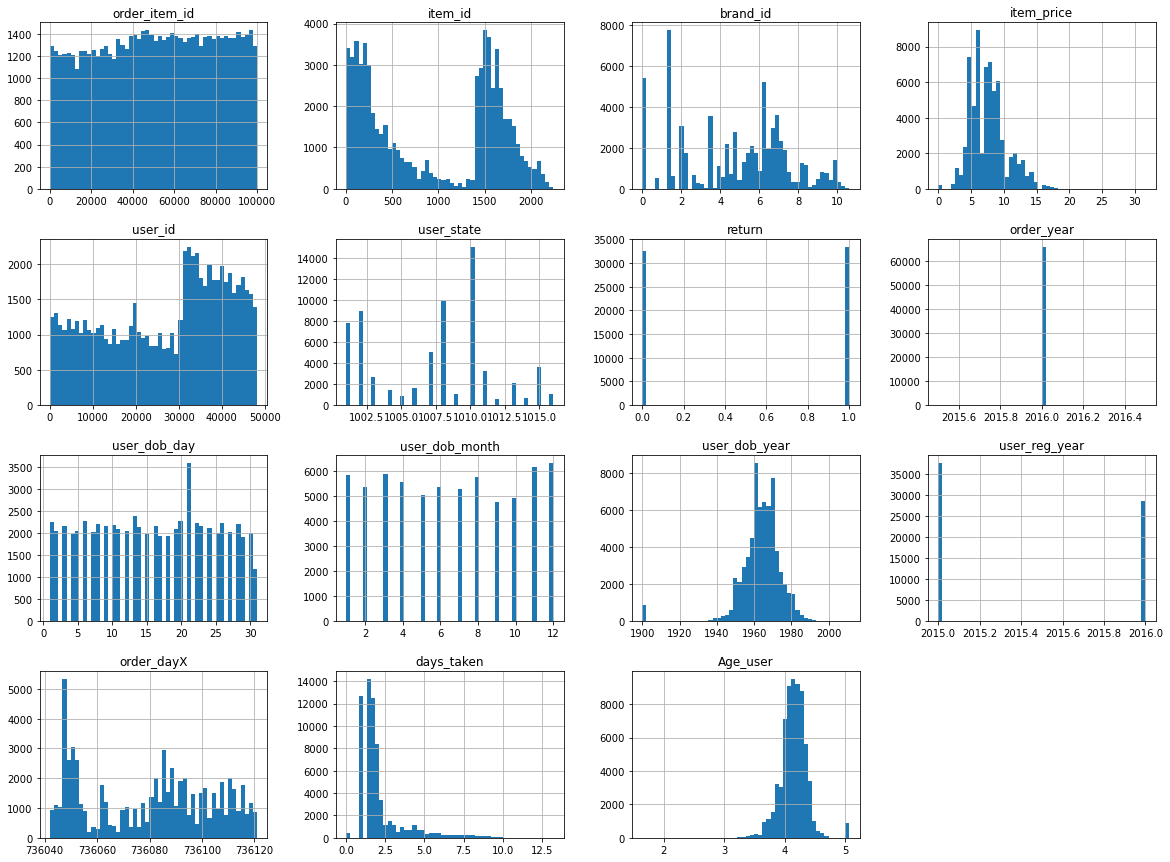

In [52]:
df.hist(bins=50,figsize=(20,15))

In [53]:
# checking any null values 
df.isnull().sum()

order_item_id       0
order_date          0
delivery_date       0
item_id             0
item_size           0
item_color          0
brand_id            0
item_price          0
user_id             0
user_dob            0
user_state          0
return              0
order_year          0
user_dob_day        0
user_dob_month      0
user_dob_year       0
user_reg_year       0
order_dayX          0
days_taken        774
Age_user            0
dtype: int64

In [54]:
#Dropping the nan values
df.dropna(inplace=True)

# Using RareLabelEncoder in item_color and item_size
- RareLabelEncode:-RareLabelCategoricalEncoder() groups rare / infrequent categories in a new category called “Rare”.

In [55]:
#Using RareLbelEncoding for item_color
encoder = RareLabelEncoder(tol=0.05, n_categories=10, variables=[ 'item_color'],
                         replace_with='Rare')

encoder.fit(df)

dataset = encoder.fit_transform(df)

encoder.encoder_dict_

{'item_color': Index(['black', 'blue', 'grey', 'brown', 'red', 'green'], dtype='object')}

In [56]:
dataset.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_dob,user_state,return,order_year,user_dob_day,user_dob_month,user_dob_year,user_reg_year,order_dayX,days_taken,Age_user
0,1,22-06-2016,27-06-2016,643,38,Rare,5.681034,7.063993,30822,17-04-1969,1013,0,2016,17,4,1969,2016,736042,2.236068,4.057076
1,10,22-06-2016,27-06-2016,195,xxl,grey,6.856435,4.460942,30823,22-04-1970,1001,1,2016,22,4,1970,2015,736042,2.236068,4.033224
2,11,22-06-2016,05-07-2016,25,xxl,grey,2.032688,8.938680,30823,22-04-1970,1001,0,2016,22,4,1970,2015,736042,3.605551,4.033224
3,32,23-06-2016,26-06-2016,173,m,brown,4.688708,4.460942,17234,09-01-1960,1013,0,2016,9,1,1960,2015,736043,1.732051,4.251904
5,45,23-06-2016,26-06-2016,448,42,Rare,8.248948,7.739509,30828,13-05-1966,1008,1,2016,13,5,1966,2016,736043,1.732051,4.125776


In [57]:
#Using RareLbelEncoding for item_size
encoder = RareLabelEncoder(tol=0.05, n_categories=10, variables=['item_size'],
                         replace_with='Rare')


encoder.fit(dataset)


dataset1 = encoder.fit_transform(dataset)

encoder.encoder_dict_

{'item_size': Index(['l', 'xl', 'm', 'xxl', '40', '39', '38', 'unsized'], dtype='object')}

In [58]:
dataset1.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_dob,user_state,return,order_year,user_dob_day,user_dob_month,user_dob_year,user_reg_year,order_dayX,days_taken,Age_user
0,1,22-06-2016,27-06-2016,643,38,Rare,5.681034,7.063993,30822,17-04-1969,1013,0,2016,17,4,1969,2016,736042,2.236068,4.057076
1,10,22-06-2016,27-06-2016,195,xxl,grey,6.856435,4.460942,30823,22-04-1970,1001,1,2016,22,4,1970,2015,736042,2.236068,4.033224
2,11,22-06-2016,05-07-2016,25,xxl,grey,2.032688,8.938680,30823,22-04-1970,1001,0,2016,22,4,1970,2015,736042,3.605551,4.033224
3,32,23-06-2016,26-06-2016,173,m,brown,4.688708,4.460942,17234,09-01-1960,1013,0,2016,9,1,1960,2015,736043,1.732051,4.251904
5,45,23-06-2016,26-06-2016,448,Rare,Rare,8.248948,7.739509,30828,13-05-1966,1008,1,2016,13,5,1966,2016,736043,1.732051,4.125776


# Visulization of catagorical feature item_color and item_size

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_size', ylabel='count'>

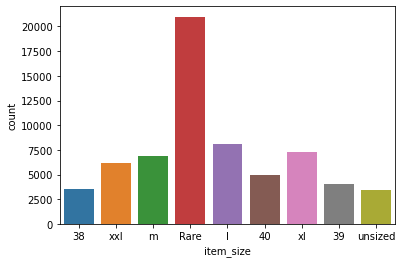

In [59]:
sns.countplot(dataset1.item_size)

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='item_color', ylabel='count'>

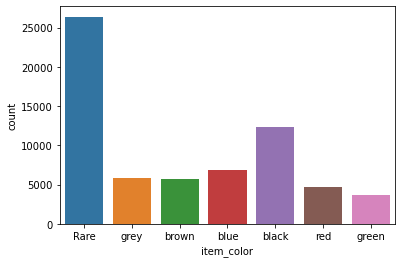

In [60]:
sns.countplot(dataset1.item_color)

# Checking if Imbalanced data
- checking weather the return value is balanced or not using sns.countplot and values_count

C:\Users\acer\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='return', ylabel='count'>

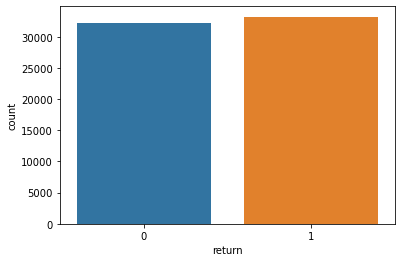

In [61]:
sns.countplot(dataset1["return"])

- With this visulization we can see that our Dataset is balanced.

# Taking care of Catagorical feature item_color and item_size
- Encoding item_color and item_size using OneHotEncoding.
- Using OneHotEncoding reson being item_color and item_size are 'Nominal Catagorical feature'.

In [62]:
colour = dataset1[["item_color"]]
colour = pd.get_dummies(colour, drop_first=True)

In [63]:
colour.head()

,item_color_black,item_color_blue,item_color_brown,item_color_green,item_color_grey,item_color_red
0,0,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
5,0,0,0,0,0,0


In [64]:
Size = dataset1[["item_size"]]
Size = pd.get_dummies(Size, drop_first=True)

In [65]:
Size.head()

,item_size_39,item_size_40,item_size_Rare,item_size_l,item_size_m,item_size_unsized,item_size_xl,item_size_xxl
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1
3,0,0,0,0,1,0,0,0
5,0,0,1,0,0,0,0,0


# Creating a final_data 
- creating a final_data for concatinating the dataset1, colour, Size.

In [66]:
#Creating a final_data
final_data = pd.concat([dataset1, colour, Size], axis=1)

In [67]:
final_data.head()

,order_item_id,order_date,delivery_date,item_id,item_size,item_color,brand_id,item_price,user_id,user_dob,...,item_color_grey,item_color_red,item_size_39,item_size_40,item_size_Rare,item_size_l,item_size_m,item_size_unsized,item_size_xl,item_size_xxl
0,1,22-06-2016,27-06-2016,643,38,Rare,5.681034,7.063993,30822,17-04-1969,...,0,0,0,0,0,0,0,0,0,0
1,10,22-06-2016,27-06-2016,195,xxl,grey,6.856435,4.460942,30823,22-04-1970,...,1,0,0,0,0,0,0,0,0,1
2,11,22-06-2016,05-07-2016,25,xxl,grey,2.032688,8.938680,30823,22-04-1970,...,1,0,0,0,0,0,0,0,0,1
3,32,23-06-2016,26-06-2016,173,m,brown,4.688708,4.460942,17234,09-01-1960,...,0,0,0,0,0,0,1,0,0,0
5,45,23-06-2016,26-06-2016,448,Rare,Rare,8.248948,7.739509,30828,13-05-1966,...,0,0,0,0,1,0,0,0,0,0


# Dropping item_color and item_size
- dropping item_color and item_size as they were encoded

In [68]:
#dropping item_color
final_data.drop(["item_color"], axis=1, inplace=True)

In [69]:
#dropping item_size
final_data.drop(["item_size"], axis=1, inplace=True)

In [70]:
final_data.columns

Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'brand_id',
       'item_price', 'user_id', 'user_dob', 'user_state', 'return',
       'order_year', 'user_dob_day', 'user_dob_month', 'user_dob_year',
       'user_reg_year', 'order_dayX', 'days_taken', 'Age_user',
       'item_color_black', 'item_color_blue', 'item_color_brown',
       'item_color_green', 'item_color_grey', 'item_color_red', 'item_size_39',
       'item_size_40', 'item_size_Rare', 'item_size_l', 'item_size_m',
       'item_size_unsized', 'item_size_xl', 'item_size_xxl'],
      dtype='object')

# Taking care of Outliers

In [71]:
capper = OutlierTrimmer(capping_method='iqr', tail='both', fold=1.5, variables=['item_price','Age_user','days_taken'])

In [72]:
# fit the capper
capper.fit(final_data)

# transform the data
final_data1= capper.fit_transform(final_data)

capper.right_tail_caps_

{'item_price': 14.144566111391157,
 'Age_user': 4.629256838055879,
 'days_taken': 3.4688496001898317}

In [73]:
final_data1.head()

,order_item_id,order_date,delivery_date,item_id,brand_id,item_price,user_id,user_dob,user_state,return,...,item_color_grey,item_color_red,item_size_39,item_size_40,item_size_Rare,item_size_l,item_size_m,item_size_unsized,item_size_xl,item_size_xxl
0,1,22-06-2016,27-06-2016,643,5.681034,7.063993,30822,17-04-1969,1013,0,...,0,0,0,0,0,0,0,0,0,0
1,10,22-06-2016,27-06-2016,195,6.856435,4.460942,30823,22-04-1970,1001,1,...,1,0,0,0,0,0,0,0,0,1
3,32,23-06-2016,26-06-2016,173,4.688708,4.460942,17234,09-01-1960,1013,0,...,0,0,0,0,0,0,1,0,0,0
5,45,23-06-2016,26-06-2016,448,8.248948,7.739509,30828,13-05-1966,1008,1,...,0,0,0,0,1,0,0,0,0,0
6,48,23-06-2016,26-06-2016,32,1.286077,4.679744,30828,13-05-1966,1008,1,...,0,0,0,0,0,1,0,0,0,0


In [74]:
final_data1.columns

Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'brand_id',
       'item_price', 'user_id', 'user_dob', 'user_state', 'return',
       'order_year', 'user_dob_day', 'user_dob_month', 'user_dob_year',
       'user_reg_year', 'order_dayX', 'days_taken', 'Age_user',
       'item_color_black', 'item_color_blue', 'item_color_brown',
       'item_color_green', 'item_color_grey', 'item_color_red', 'item_size_39',
       'item_size_40', 'item_size_Rare', 'item_size_l', 'item_size_m',
       'item_size_unsized', 'item_size_xl', 'item_size_xxl'],
      dtype='object')

In [75]:
Return = final_data1[["return"]]

In [76]:
Return

,return
0,0
1,1
3,0
5,1
6,1
...,...
79938,1
79939,1
79940,1
79942,0


In [77]:
final_data1.drop(["return"],axis=1, inplace=True)

In [78]:
final_data1.columns

Index(['order_item_id', 'order_date', 'delivery_date', 'item_id', 'brand_id',
       'item_price', 'user_id', 'user_dob', 'user_state', 'order_year',
       'user_dob_day', 'user_dob_month', 'user_dob_year', 'user_reg_year',
       'order_dayX', 'days_taken', 'Age_user', 'item_color_black',
       'item_color_blue', 'item_color_brown', 'item_color_green',
       'item_color_grey', 'item_color_red', 'item_size_39', 'item_size_40',
       'item_size_Rare', 'item_size_l', 'item_size_m', 'item_size_unsized',
       'item_size_xl', 'item_size_xxl'],
      dtype='object')

In [79]:
final_data1.drop(["order_date"],axis=1, inplace=True)
final_data1.drop(["delivery_date"],axis=1, inplace=True)
final_data1.drop(["user_reg_year"],axis=1, inplace=True)
final_data1.drop(["user_dob"],axis=1, inplace=True)
final_data1.drop(["order_year"],axis=1, inplace=True)
final_data1.drop(["order_dayX"],axis=1, inplace=True)
final_data1.drop(["user_dob_day"],axis=1, inplace=True)
final_data1.drop(["user_dob_month"],axis=1, inplace=True)
final_data1.drop(["user_dob_year"],axis=1, inplace=True)

In [80]:
final_data1.head()

,order_item_id,item_id,brand_id,item_price,user_id,user_state,days_taken,Age_user,item_color_black,item_color_blue,...,item_color_grey,item_color_red,item_size_39,item_size_40,item_size_Rare,item_size_l,item_size_m,item_size_unsized,item_size_xl,item_size_xxl
0,1,643,5.681034,7.063993,30822,1013,2.236068,4.057076,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,195,6.856435,4.460942,30823,1001,2.236068,4.033224,0,0,...,1,0,0,0,0,0,0,0,0,1
3,32,173,4.688708,4.460942,17234,1013,1.732051,4.251904,0,0,...,0,0,0,0,0,0,1,0,0,0
5,45,448,8.248948,7.739509,30828,1008,1.732051,4.125776,0,0,...,0,0,0,0,1,0,0,0,0,0
6,48,32,1.286077,4.679744,30828,1008,1.732051,4.125776,0,0,...,0,0,0,0,0,1,0,0,0,0


In [81]:
final_data1.columns

Index(['order_item_id', 'item_id', 'brand_id', 'item_price', 'user_id',
       'user_state', 'days_taken', 'Age_user', 'item_color_black',
       'item_color_blue', 'item_color_brown', 'item_color_green',
       'item_color_grey', 'item_color_red', 'item_size_39', 'item_size_40',
       'item_size_Rare', 'item_size_l', 'item_size_m', 'item_size_unsized',
       'item_size_xl', 'item_size_xxl'],
      dtype='object')

In [82]:
final_data1.head()

,order_item_id,item_id,brand_id,item_price,user_id,user_state,days_taken,Age_user,item_color_black,item_color_blue,...,item_color_grey,item_color_red,item_size_39,item_size_40,item_size_Rare,item_size_l,item_size_m,item_size_unsized,item_size_xl,item_size_xxl
0,1,643,5.681034,7.063993,30822,1013,2.236068,4.057076,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,195,6.856435,4.460942,30823,1001,2.236068,4.033224,0,0,...,1,0,0,0,0,0,0,0,0,1
3,32,173,4.688708,4.460942,17234,1013,1.732051,4.251904,0,0,...,0,0,0,0,0,0,1,0,0,0
5,45,448,8.248948,7.739509,30828,1008,1.732051,4.125776,0,0,...,0,0,0,0,1,0,0,0,0,0
6,48,32,1.286077,4.679744,30828,1008,1.732051,4.125776,0,0,...,0,0,0,0,0,1,0,0,0,0


In [83]:
final_data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53388 entries, 0 to 79944
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_item_id      53388 non-null  int64  
 1   item_id            53388 non-null  int64  
 2   brand_id           53388 non-null  float64
 3   item_price         53388 non-null  float64
 4   user_id            53388 non-null  int64  
 5   user_state         53388 non-null  int64  
 6   days_taken         53388 non-null  float64
 7   Age_user           53388 non-null  float64
 8   item_color_black   53388 non-null  uint8  
 9   item_color_blue    53388 non-null  uint8  
 10  item_color_brown   53388 non-null  uint8  
 11  item_color_green   53388 non-null  uint8  
 12  item_color_grey    53388 non-null  uint8  
 13  item_color_red     53388 non-null  uint8  
 14  item_size_39       53388 non-null  uint8  
 15  item_size_40       53388 non-null  uint8  
 16  item_size_Rare     533

# Making a final_dataset 
- Concatinating the final_data1, return in final_dataset

In [84]:
final_dataset = pd.concat([final_data1,Return], axis=1)

In [85]:
final_dataset.head()

,order_item_id,item_id,brand_id,item_price,user_id,user_state,days_taken,Age_user,item_color_black,item_color_blue,...,item_color_red,item_size_39,item_size_40,item_size_Rare,item_size_l,item_size_m,item_size_unsized,item_size_xl,item_size_xxl,return
0,1,643,5.681034,7.063993,30822,1013,2.236068,4.057076,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,195,6.856435,4.460942,30823,1001,2.236068,4.033224,0,0,...,0,0,0,0,0,0,0,0,1,1
3,32,173,4.688708,4.460942,17234,1013,1.732051,4.251904,0,0,...,0,0,0,0,0,1,0,0,0,0
5,45,448,8.248948,7.739509,30828,1008,1.732051,4.125776,0,0,...,0,0,0,1,0,0,0,0,0,1
6,48,32,1.286077,4.679744,30828,1008,1.732051,4.125776,0,0,...,0,0,0,0,1,0,0,0,0,1


In [86]:
final_dataset.columns

Index(['order_item_id', 'item_id', 'brand_id', 'item_price', 'user_id',
       'user_state', 'days_taken', 'Age_user', 'item_color_black',
       'item_color_blue', 'item_color_brown', 'item_color_green',
       'item_color_grey', 'item_color_red', 'item_size_39', 'item_size_40',
       'item_size_Rare', 'item_size_l', 'item_size_m', 'item_size_unsized',
       'item_size_xl', 'item_size_xxl', 'return'],
      dtype='object')

In [87]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53388 entries, 0 to 79944
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_item_id      53388 non-null  int64  
 1   item_id            53388 non-null  int64  
 2   brand_id           53388 non-null  float64
 3   item_price         53388 non-null  float64
 4   user_id            53388 non-null  int64  
 5   user_state         53388 non-null  int64  
 6   days_taken         53388 non-null  float64
 7   Age_user           53388 non-null  float64
 8   item_color_black   53388 non-null  uint8  
 9   item_color_blue    53388 non-null  uint8  
 10  item_color_brown   53388 non-null  uint8  
 11  item_color_green   53388 non-null  uint8  
 12  item_color_grey    53388 non-null  uint8  
 13  item_color_red     53388 non-null  uint8  
 14  item_size_39       53388 non-null  uint8  
 15  item_size_40       53388 non-null  uint8  
 16  item_size_Rare     533

# Using pairplot

In [ ]:
# sns.pairplot(final_dataset, hue='return')

# Making Independent and Dependent(targent) variables
- X is the independent variable contains all the features except return(traget values).
- y is the dependent variable contains return value(target value).

In [90]:
X = final_dataset.iloc[:, :22]  #Independent
y = final_dataset.iloc[:, 22]   #Dependent

In [91]:
X.head()

,order_item_id,item_id,brand_id,item_price,user_id,user_state,days_taken,Age_user,item_color_black,item_color_blue,...,item_color_grey,item_color_red,item_size_39,item_size_40,item_size_Rare,item_size_l,item_size_m,item_size_unsized,item_size_xl,item_size_xxl
0,1,643,5.681034,7.063993,30822,1013,2.236068,4.057076,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,195,6.856435,4.460942,30823,1001,2.236068,4.033224,0,0,...,1,0,0,0,0,0,0,0,0,1
3,32,173,4.688708,4.460942,17234,1013,1.732051,4.251904,0,0,...,0,0,0,0,0,0,1,0,0,0
5,45,448,8.248948,7.739509,30828,1008,1.732051,4.125776,0,0,...,0,0,0,0,1,0,0,0,0,0
6,48,32,1.286077,4.679744,30828,1008,1.732051,4.125776,0,0,...,0,0,0,0,0,1,0,0,0,0


In [92]:
y.head()

0    0
1    1
3    0
5    1
6    1
Name: return, dtype: int64

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53388 entries, 0 to 79944
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_item_id      53388 non-null  int64  
 1   item_id            53388 non-null  int64  
 2   brand_id           53388 non-null  float64
 3   item_price         53388 non-null  float64
 4   user_id            53388 non-null  int64  
 5   user_state         53388 non-null  int64  
 6   days_taken         53388 non-null  float64
 7   Age_user           53388 non-null  float64
 8   item_color_black   53388 non-null  uint8  
 9   item_color_blue    53388 non-null  uint8  
 10  item_color_brown   53388 non-null  uint8  
 11  item_color_green   53388 non-null  uint8  
 12  item_color_grey    53388 non-null  uint8  
 13  item_color_red     53388 non-null  uint8  
 14  item_size_39       53388 non-null  uint8  
 15  item_size_40       53388 non-null  uint8  
 16  item_size_Rare     533

# Feature Selection
- using ExtraTreeClassifier
- using mutual info_classif

In [94]:
#ExtraTreeClassifier 
imp = ExtraTreesClassifier()
imp.fit(X,y)

ExtraTreesClassifier()

In [95]:
#Feature importance 
imp.feature_importances_

array([0.15855757, 0.11087018, 0.08369359, 0.10788188, 0.12767005,
       0.10314058, 0.08647354, 0.12024836, 0.01331056, 0.00968823,
       0.0072064 , 0.00669906, 0.00990427, 0.00906931, 0.00467049,
       0.0040869 , 0.006229  , 0.0068886 , 0.00655259, 0.00591932,
       0.00613563, 0.00510388])

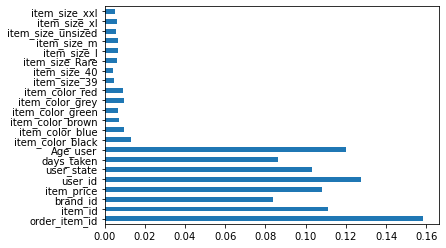

In [96]:
#Ploting into barh graph
imp_ = pd.Series(imp.feature_importances_, index=X.columns)
imp_.plot(kind='barh')
plt.show()

In [97]:
m_info = mutual_info_classif(X,y)
m_data = pd.Series(m_info, index=X.columns)
m_data.sort_values(ascending=True)

item_size_xxl        0.000000
item_size_l          0.000000
item_size_Rare       0.000000
item_size_39         0.000000
item_size_xl         0.000000
days_taken           0.000000
user_state           0.000312
item_color_brown     0.000503
item_color_blue      0.000541
item_size_40         0.000574
item_size_m          0.001027
item_color_black     0.001280
item_size_unsized    0.001875
item_color_red       0.002849
Age_user             0.002969
item_color_grey      0.002997
item_color_green     0.003489
item_price           0.015737
brand_id             0.020504
item_id              0.037093
order_item_id        0.091117
user_id              0.097199
dtype: float64

In [ ]:
user_id, user_state, order_item_id

# Spliting into traning and testing set
- spliting into X_train, X_test, y_train, y_test

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=0)

# Creating model
- creating rf model using RandomForestClassifier
- traning our model with X_train, y_train

In [99]:
rf=RandomForestClassifier()  #Creating Model
rf.fit(X_train,y_train)      #fitting X_train, y_train 

RandomForestClassifier()

# Predicting using X_test
- testing our model using X_test

In [100]:
y_pred = rf.predict(X_test) # to predict the return values of X_test

# Checking model accuracy
- using confusion matrix, f1_score, accuracy

In [101]:
cf = confusion_matrix(y_test, y_pred)  #confusion metrix
f = f1_score(y_test, y_pred)           #f1_sore
a_s = accuracy_score(y_test, y_pred)   #accuracy_score

In [102]:
#confusion metrix
cf

array([[2812, 2343],
       [1849, 3674]], dtype=int64)

In [103]:
#f1_score
f

0.6367417677642981

In [104]:
#Accuracy_score
a_s

0.6074171193107324

# Hypertuning 

In [105]:
# from sklearn.model_selection import RandomizedSearchCV


# #Randomized Search CV

# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10, 15, 100]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 5, 10]

In [106]:
# # Create the random grid

# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}

In [107]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [108]:
# rf_random.fit(X_train,y_train)

In [109]:
# rf_random.best_params_

'''
Output the best parameters we got after hypertuning:-
{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}
'''

"\nOutput the best parameters we got after hypertuning:-\n{'n_estimators': 1000,\n 'min_samples_split': 2,\n 'min_samples_leaf': 1,\n 'max_features': 'sqrt',\n 'max_depth': 25}\n"

In [110]:
# prediction = rf_random.predict(X_test)

In [111]:
# confusion_matrix(y_test, prediction)

In [112]:
# accuracy_score(y_test, prediction)

In [113]:
# f1_score(y_test, prediction)

# Creating model after Hypertuning
- creating rf_random model using RandomForestClassifier after hypertuning
- traning our model with X, y

In [114]:
rf_random = RandomForestClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=1,
                                      max_features='sqrt',max_depth=25)

rf_random.fit(X_train, y_train) #traning the model using X_train and y_train

RandomForestClassifier(max_depth=25, max_features='sqrt', n_estimators=1000)

In [116]:
y_preds = rf_random.predict(X_test)

# Creating a pickle file

In [120]:
import pickle

In [121]:
pickle_out = open("return_prediction.pkl", "wb")
pickle.dump(rf_random, pickle_out)
pickle_out.close()